### Mobile Price Classification

###### classify mobile price range

We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
Link to dataset - 

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [6]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
29/29 [==============================] - 0s 11ms/step - loss: 1.3866 - accuracy: 0.2889
Epoch 2/10
29/29 [==============================] - 0s 1ms/step - loss: 1.3141 - accuracy: 0.3661
Epoch 3/10
29/29 [==============================] - 0s 1ms/step - loss: 1.2529 - accuracy: 0.4322
Epoch 4/10
29/29 [==============================] - 0s 1ms/step - loss: 1.1789 - accuracy: 0.4933
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 1.0844 - accuracy: 0.5628
Epoch 6/10
29/29 [==============================] - 0s 1ms/step - loss: 0.9812 - accuracy: 0.6061
Epoch 7/10
29/29 [==============================] - 0s 1ms/step - loss: 0.8867 - accuracy: 0.6467
Epoch 8/10
29/29 [==============================] - 0s 1ms/step - loss: 0.8036 - accuracy: 0.6778
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.7122
Epoch 10/10
29/29 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7544


In [9]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [10]:

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [11]:

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 72.5


In [12]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=64)

Epoch 1/10
29/29 [==============================] - 1s 20ms/step - loss: 0.6138 - accuracy: 0.7844 - val_loss: 0.6097 - val_accuracy: 0.7550
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.5643 - accuracy: 0.8094 - val_loss: 0.5650 - val_accuracy: 0.7750
Epoch 3/10
29/29 [==============================] - 0s 6ms/step - loss: 0.5197 - accuracy: 0.8222 - val_loss: 0.5336 - val_accuracy: 0.7700
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.8467 - val_loss: 0.4974 - val_accuracy: 0.8050
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.8617 - val_loss: 0.4668 - val_accuracy: 0.8250
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8739 - val_loss: 0.4416 - val_accuracy: 0.8300
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.3885 - accuracy: 0.8839 - val_loss: 0.4168 - val_accuracy: 0.8450
Epoch 8/10
29/29 [=

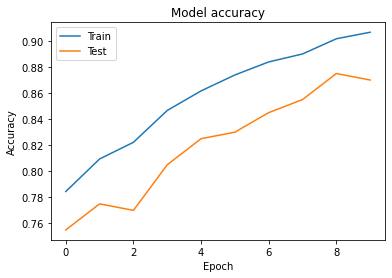

In [13]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

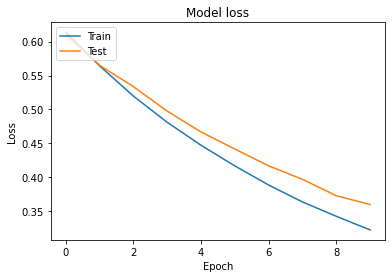

In [14]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()